In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle
import sklearn.metrics as metrics

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import make_scorer

In [3]:
from multioutput_functions import *

In [167]:
# def f1score_jd_p(true_Y,pred_Y):
#     '''
#     '''
#     interval=1
#     # Initialize the precision, f1-score, and recall dictionaries
#     tp = {}
#     fn = {}
#     fp = {}
#     tn = {}
#     negs = []
#     precision = {}
#     f1_score = {}
#     recall = {}

#     predicted_primsec = [sorted(pp) for pp in pred_Y]
#     predicted_outputs = np.array([int(cc[0]) for cc in predicted_primsec])
#     true_outputs      = np.array([int(cc[0]) for cc in true_Y])
#     unique_list       = unique(true_outputs)

#     for value in unique_list:
#         value_position = np.where(true_outputs == value)[0]
#         inlimit = np.where(np.abs(predicted_outputs-value)<=interval)[0]
#         outlimit = np.where(np.abs(predicted_outputs-value)>interval)[0]

#         tp[value] = sorted(list(set(value_position).intersection(inlimit)))
#         negs     += sorted(list(set(value_position).intersection(outlimit)))
#         fn[value] = sorted(list(set(value_position).intersection(outlimit)))



#     for neg in negs:
#         negpred = predicted_outputs[neg]
#         closest_value = min(unique_list, key=lambda x: abs(x - negpred))
#         try:
#             fp[closest_value] += [neg]
#         except KeyError:
#             fp[closest_value] = [neg]

#     for value in unique_list:
#         if value not in fp.keys():
#             fp[value]=[]
#         used = tp[value]+fn[value]+fp[value]
#         tn[value] = [i for i in range(len(true_outputs)) if i not in used]
#         if len(tp[value])==0:
#             precision[value] = 0
#             recall[value] = 0
#             f1_score[value] = 0
#         else:
#             precision[value] = len(tp[value])/(len(fp[value])+len(tp[value]))
#             recall[value] = len(tp[value])/(len(fn[value])+len(tp[value]))
#             f1_score[value] = 2*precision[value]*recall[value]/(precision[value] + recall[value])

#     f1_score = [f1_score[k] for k in f1_score.keys()]
#     return np.nanmean(f1_score)

In [168]:
# def f1score_jd_s(true_Y,pred_Y):
#     '''
#     '''
#     interval=1
#     # Initialize the precision, f1-score, and recall dictionaries
#     tp = {}
#     fn = {}
#     fp = {}
#     tn = {}
#     negs = []
#     precision = {}
#     f1_score = {}
#     recall = {}

#     predicted_primsec = [sorted(pp) for pp in pred_Y]
#     predicted_outputs = np.array([int(cc[1]) for cc in predicted_primsec])
#     true_outputs      = np.array([int(cc[1]) for cc in true_Y])
#     unique_list       = unique(true_outputs)

#     for value in unique_list:
#         value_position = np.where(true_outputs == value)[0]
#         inlimit = np.where(np.abs(predicted_outputs-value)<=interval)[0]
#         outlimit = np.where(np.abs(predicted_outputs-value)>interval)[0]

#         tp[value] = sorted(list(set(value_position).intersection(inlimit)))
#         negs     += sorted(list(set(value_position).intersection(outlimit)))
#         fn[value] = sorted(list(set(value_position).intersection(outlimit)))



#     for neg in negs:
#         negpred = predicted_outputs[neg]
#         closest_value = min(unique_list, key=lambda x: abs(x - negpred))
#         try:
#             fp[closest_value] += [neg]
#         except KeyError:
#             fp[closest_value] = [neg]

#     for value in unique_list:
#         if value not in fp.keys():
#             fp[value]=[]
#         used = tp[value]+fn[value]+fp[value]
#         tn[value] = [i for i in range(len(true_outputs)) if i not in used]
#         if len(tp[value])==0:
#             precision[value] = 0
#             recall[value] = 0
#             f1_score[value] = 0
#         else:
#             precision[value] = len(tp[value])/(len(fp[value])+len(tp[value]))
#             recall[value] = len(tp[value])/(len(fn[value])+len(tp[value]))
#             f1_score[value] = 2*precision[value]*recall[value]/(precision[value] + recall[value])

#     f1_score = [f1_score[k] for k in f1_score.keys()]
#     return np.nanmean(f1_score)

In [169]:
# def f1score_jd(true_Y,pred_Y):
#     '''
#     '''
#     score1 = f1score_jd_p(true_Y,pred_Y)
#     score2 = f1score_jd_s(true_Y,pred_Y)

#     return (score1 + score2) / 2

In [21]:
def f1score_jd(true_Y,pred_Y):
    interval=1
    # Initialize the precision, f1-score, and recall dictionaries
    tp = {}
    fn = {}
    fp = {}
    tn = {}
    negs = []
    precision = {}
    f1_score = {}
    recall = {}
    lengths = {}

    predicted_primsec = [sorted(pp) for pp in pred_Y]
    predicted_outputs = np.array([int(cc[0]) for cc in predicted_primsec])
    true_outputs      = np.array([int(cc[0]) for cc in true_Y])
    unique_list       = unique(true_outputs)

    for value in unique_list:
        value_position = np.where(true_outputs == value)[0]
        inlimit = np.where(np.abs(predicted_outputs-value)<=interval)[0]
        outlimit = np.where(np.abs(predicted_outputs-value)>interval)[0]

        tp[value] = sorted(list(set(value_position).intersection(inlimit)))
        negs     += sorted(list(set(value_position).intersection(outlimit)))
        fn[value] = sorted(list(set(value_position).intersection(outlimit)))
        lengths[value] = len(value_position)

    for neg in negs:
        negpred = predicted_outputs[neg]
        closest_value = min(unique_list, key=lambda x: abs(x - negpred))
        try:
            fp[closest_value] += [neg]
        except KeyError:
            fp[closest_value] = [neg]

    for value in unique_list:
        if value not in fp.keys():
            fp[value]=[]
        used = tp[value]+fn[value]+fp[value]
        tn[value] = [i for i in range(len(true_outputs)) if i not in used]
        if len(tp[value])==0:
            precision[value] = 0
            recall[value] = 0
            f1_score[value] = 0
        else:
            precision[value] = len(tp[value])/(len(fp[value])+len(tp[value]))
            recall[value] = len(tp[value])/(len(fn[value])+len(tp[value]))
            f1_score[value] = 2*precision[value]*recall[value]/(precision[value] + recall[value])

    totlength = np.sum([lengths[k] for k in lengths.keys()])
    length_percentage = {}
    for key in lengths.keys():
        length_percentage[key]=lengths[key]/totlength
    f1_weighted = [f1_score[k]*length_percentage[k] for k in f1_score.keys()]
    f1_p = np.nansum(f1_weighted)
    # f1_score = [f1_score[k] for k in f1_score.keys()]
    # f1_p = np.mean(f1_score)


    interval=1
    # Initialize the precision, f1-score, and recall dictionaries
    tp = {}
    fn = {}
    fp = {}
    tn = {}
    negs = []
    precision = {}
    f1_score = {}
    recall = {}
    lengths = {}

    predicted_primsec = [sorted(pp) for pp in pred_Y]
    predicted_outputs = np.array([int(cc[1]) for cc in predicted_primsec])
    true_outputs      = np.array([int(cc[1]) for cc in true_Y])
    unique_list       = unique(true_outputs)

    for value in unique_list:
        value_position = np.where(true_outputs == value)[0]
        inlimit = np.where(np.abs(predicted_outputs-value)<=interval)[0]
        outlimit = np.where(np.abs(predicted_outputs-value)>interval)[0]

        tp[value] = sorted(list(set(value_position).intersection(inlimit)))
        negs     += sorted(list(set(value_position).intersection(outlimit)))
        fn[value] = sorted(list(set(value_position).intersection(outlimit)))
        lengths[value] = len(value_position)

    for neg in negs:
        negpred = predicted_outputs[neg]
        closest_value = min(unique_list, key=lambda x: abs(x - negpred))
        try:
            fp[closest_value] += [neg]
        except KeyError:
            fp[closest_value] = [neg]

    for value in unique_list:
        if value not in fp.keys():
            fp[value]=[]
        used = tp[value]+fn[value]+fp[value]
        tn[value] = [i for i in range(len(true_outputs)) if i not in used]
        if len(tp[value])==0:
            precision[value] = 0
            recall[value] = 0
            f1_score[value] = 0
        else:
            precision[value] = len(tp[value])/(len(fp[value])+len(tp[value]))
            recall[value] = len(tp[value])/(len(fn[value])+len(tp[value]))
            f1_score[value] = 2*precision[value]*recall[value]/(precision[value] + recall[value])
    totlength = np.sum([lengths[k] for k in lengths.keys()])
    length_percentage = {}
    for key in lengths.keys():
        length_percentage[key]=lengths[key]/totlength
    f1_weighted = [f1_score[k]*length_percentage[k] for k in f1_score.keys()]
    f1_s = np.nansum(f1_weighted)
    # f1_score = [f1_score[k] for k in f1_score.keys()]
    # f1_s=np.mean(f1_score)

    f1=(f1_p+f1_s)/2
    return f1  

In [22]:
def MO_optimize(bin_df, telluric= False, difference=False, test_size=0.30, random_state=42, shuffle=True, traindata=False, shape=False):
    feats = list(bin_df.columns)
    feats.remove('primary_type')
    feats.remove('secondary_type')
    feats.remove('system_interpolated_flux')
    feats.remove('system_interpolated_noise')
    feats.remove('J_SNR')
    feats.remove('SNR_CLASS')
    feats.remove('WAVE')
    if difference==True:
        feats.remove('difference_spectrum')

    if telluric==True:
        telluric_mask = list(np.where(np.logical_or(np.logical_and(wavegrid > 1.35,wavegrid < 1.42), np.logical_and(wavegrid > 1.8,wavegrid < 1.95)))[0])
        for mask in telluric_mask:
            feats.remove('flux_'+str(mask))
    else:
        pass

    xlist = np.array(bin_df[feats]) #data

    typelist = ['primary_type','secondary_type']
    y=[]
    for i in range(len(bin_df)):
        zz = []
        for j in typelist:
            zz.append(bin_df[j][i])
        y.append(zz)
    ylist = np.array(y)

    if shape==True:
        print(xlist.shape, ylist.shape)

    # split features and target variables into train and test split. Train set will have 70% of the features and the test will have 30% of the features.
    x_train, x_test, y_train, y_test = train_test_split(xlist, ylist, test_size=test_size, random_state=random_state, shuffle=shuffle)

    # param_grid = dict(estimator__n_estimators=uniform(loc=1, scale=9))
    param_grid = dict(estimator__n_estimators=[int(i) for i in np.linspace(1,201,101)])

    # Initialize the multi-output regressor and the grid search
    f1 = metrics.f1_score
    precision = metrics.precision_score
    recall = metrics.recall_score
    # clf = MultiOutputRegressor(RandomForestRegressor(random_state=0,min_samples_leaf=2, min_samples_split=5,n_jobs=-1))
    clf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1))
    # grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, refit=True, scoring=[f1,precision,recall])
    # grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, refit=True, scoring=precision)
    # grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, refit=True)
    # grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, refit='f1_weighted', scoring=['f1_weighted', 'accuracy'])
    custom_scorer = make_scorer(f1score_jd, greater_is_better=True)
    grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, n_iter=20, scoring=custom_scorer)
    # grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, refit=f1score_jd2)
    # , refit=‘f1’, scoring=[‘f1’, ‘accuracy’])

    # Fit the GridSearchCV object to the data
    grid_search.fit(x_train, y_train)

    # Extract the best model and the corresponding score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    if traindata==True:
        return best_model, x_test, y_test, x_train, y_train, grid_search.best_params_, best_score
    else:
        return grid_search, x_test, y_test

In [6]:
# [int(i) for i in np.linspace(1,61,21)]
# best is 4--> 0.76066567, vs 37--> 0.7462242
[int(i) for i in np.linspace(1,201,51)]

[1,
 5,
 9,
 13,
 17,
 21,
 25,
 29,
 33,
 37,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101,
 105,
 109,
 113,
 117,
 121,
 125,
 129,
 133,
 137,
 141,
 145,
 149,
 153,
 157,
 161,
 165,
 169,
 173,
 177,
 181,
 185,
 189,
 193,
 197,
 201]

In [7]:
with open('data/BinDF_hig.pickle', 'rb') as f:
        BinDF_hig = pickle.load(f)
fluxnan=[]
for i in range(409):
    fluxnan.append(np.isnan(BinDF_hig['flux_'+str(i)]).any())
(np.array(fluxnan)==True).any()

False

In [23]:
start = time.time()
clfhig, x_hig, y_hig = MO_optimize(BinDF_hig)
MO_hig = clfhig.best_estimator_
end = time.time()
print(end-start)

11901.24998140335


In [24]:
z_hig = MO_hig.predict(x_hig)

In [25]:
clfhig.cv_results_

{'mean_fit_time': array([ 498.59229155, 2653.39194908, 2167.1561254 , 3084.87794714,
        1658.85580139, 1192.86779585, 1097.53785806, 2012.27326965,
         716.98344917, 1813.56689467, 1406.38810263, 1375.1807569 ,
        2718.23002615, 2125.36537566,  271.87643657, 3130.07560916,
        2382.73511558, 2611.32180443, 1730.19284983,  833.92617717]),
 'std_fit_time': array([  4.71439412,   7.27558412,   2.60304155,  10.26622091,
         37.06434993,  28.80358943,  54.861207  ,   4.94771962,
          2.89487316,  15.44153121,   4.70197815,   7.28077613,
         29.04233662,  16.94766414,  42.24315792,  12.75967167,
         18.59704191,   6.37569357, 420.73507742,  87.8870048 ]),
 'mean_score_time': array([79.98287468, 79.51370516, 63.54857235, 79.49359908, 66.01989722,
        69.42931266, 65.8750351 , 73.04145899, 50.07637081, 75.17508721,
        69.80810404, 56.11579313, 91.56640539, 80.77136464, 79.01365986,
        86.44202714, 88.9634572 , 73.31825938, 12.97287445, 35.79

In [26]:
clfhig.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_estimator__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [27]:
clfhig.cv_results_['rank_test_score']

array([ 1, 10, 20, 18,  5,  9,  4, 12, 13,  3,  8,  7, 15, 19,  2, 17, 16,
       11, 14,  6])

In [41]:
clfhig.cv_results_['mean_test_score']

array([0.8074479 , 0.8040481 , 0.8025545 , 0.80276951, 0.80464775,
       0.80427311, 0.80486719, 0.80370107, 0.80367398, 0.80512412,
       0.80429812, 0.8043785 , 0.80321183, 0.80265524, 0.80691512,
       0.80303757, 0.803141  , 0.80385318, 0.80347624, 0.80462953])

In [28]:
max(clfhig.cv_results_['mean_test_score'])

0.8074478985909325

In [29]:
clfhig.cv_results_['params']

[{'estimator__n_estimators': 21},
 {'estimator__n_estimators': 167},
 {'estimator__n_estimators': 129},
 {'estimator__n_estimators': 195},
 {'estimator__n_estimators': 103},
 {'estimator__n_estimators': 75},
 {'estimator__n_estimators': 67},
 {'estimator__n_estimators': 135},
 {'estimator__n_estimators': 35},
 {'estimator__n_estimators': 117},
 {'estimator__n_estimators': 83},
 {'estimator__n_estimators': 87},
 {'estimator__n_estimators': 179},
 {'estimator__n_estimators': 131},
 {'estimator__n_estimators': 9},
 {'estimator__n_estimators': 193},
 {'estimator__n_estimators': 145},
 {'estimator__n_estimators': 169},
 {'estimator__n_estimators': 163},
 {'estimator__n_estimators': 63}]

In [30]:
clfhig.best_score_

0.8074478985909325

In [31]:
f1score_jd(y_hig,z_hig)

0.813085899454754

In [32]:
start = time.time()
df_avgdiffprim_hig, df_avgdiffseco_hig, df_stdprim_hig, df_stdseco_hig, predsprim_hig, predssec_hig, realprim_hig, realsec_hig = binaryPrecision(x_hig,y_hig,MO_hig, predictions=True)
end = time.time()
print(end-start)

125.73587226867676


-0.010988610729737391


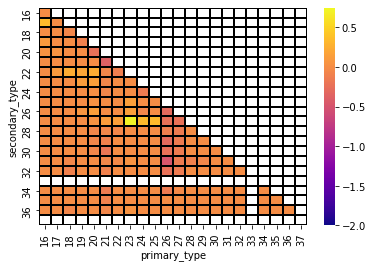

In [33]:
sns.heatmap(df_avgdiffprim_hig.drop([38,39],axis=1).drop([38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_hig.mean(axis = 0, skipna = True).mean())

-0.0019026441497140307


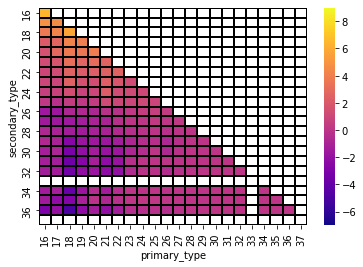

In [34]:
sns.heatmap(df_avgdiffseco_hig.drop([38,39],axis=1).drop([38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_hig.mean(axis = 0, skipna = True).mean())

0.22155165224913648


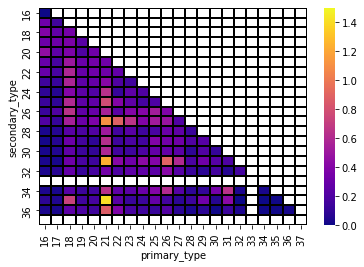

In [35]:
sns.heatmap(df_stdprim_hig.drop([38,39],axis=1).drop([38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_hig.mean(axis = 0, skipna = True).mean())

0.723625959558446


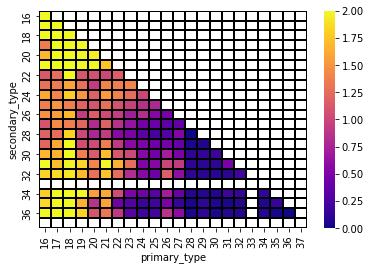

In [36]:
sns.heatmap(df_stdseco_hig.drop([38,39],axis=1).drop([38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_hig.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [0.9471239,
   1.099546,
   1.1244725,
   1.128654,
   1.1328428,
   2.3483794],
  'importance': [0.05381471402302849,
   0.09868368949239797,
   0.09907387881407578,
   0.42785105255889766,
   0.06584297930575876,
   0.13549689909759682]},
 'secondary_type': {'wavegrid': [1.1538873,
   1.1835947,
   1.3256073,
   1.6226279,
   1.6700326],
  'importance': [0.014756691880178316,
   0.2874929648360809,
   0.04616208335910541,
   0.018007453321538396,
   0.015672287558604926]}}

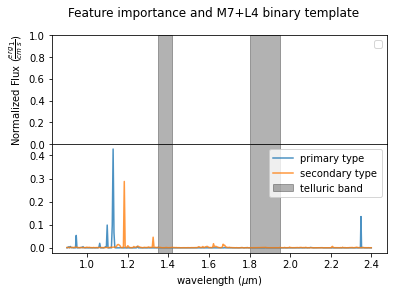

In [37]:
fig, ax = plt.subplots(2,1,sharex=True)

# ax[0].plot(wavegrid,f17hig)
# ax[0].plot(wavegrid,f24hig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_hig = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_hig.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig['primary_type']['importance'] = eee[0]
feat_impts_hig['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig['secondary_type']['importance'] = eee[1]
feat_impts_hig

{'primary_type': {'wavegrid': [0.9471239,
   1.099546,
   1.1244725,
   1.128654,
   1.1328428,
   2.3483794],
  'importance': [0.05381471402302849,
   0.09868368949239797,
   0.09907387881407578,
   0.42785105255889766,
   0.06584297930575876,
   0.13549689909759682]},
 'secondary_type': {'wavegrid': [1.1538873,
   1.1835947,
   1.3256073,
   1.6226279,
   1.6700326],
  'importance': [0.014756691880178316,
   0.2874929648360809,
   0.04616208335910541,
   0.018007453321538396,
   0.015672287558604926]}}

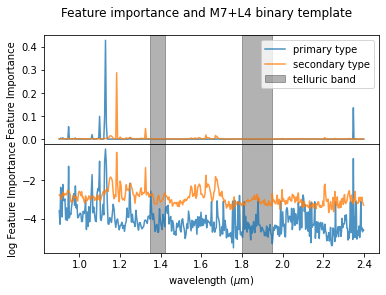

In [44]:
fig, ax = plt.subplots(2,1,sharex=True)

feat_impts_hig = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_hig.estimators_:
    ax[0].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
for clf in MO_hig.estimators_:
    ax[1].plot(wavegrid,np.log10(clf.feature_importances_), alpha=0.8)
ax[0].set_ylabel('Feature Importance')
ax[1].set_ylabel('log Feature Importance')
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[0].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig['primary_type']['importance'] = eee[0]
feat_impts_hig['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig['secondary_type']['importance'] = eee[1]
feat_impts_hig

In [38]:
precisionprim_hig1, recallprim_hig1, f1_scoreprim_hig1, accuracyprim_hig1 = calculate_metrics(realprim_hig,predsprim_hig,1)
precisionsec_hig1, recallsec_hig1, f1_scoresec_hig1, accuracysec_hig1 = calculate_metrics(realsec_hig,predssec_hig,1)
precisionprim_hig3, recallprim_hig3, f1_scoreprim_hig3, accuracyprim_hig3 = calculate_metrics(realprim_hig,predsprim_hig,3)
precisionsec_hig3, recallsec_hig3, f1_scoresec_hig3, accuracysec_hig3 = calculate_metrics(realsec_hig,predssec_hig,3)

In [39]:
f1_scoresec_hig1

{16: 0,
 17: 0.05755395683453237,
 18: 0.049019607843137254,
 19: 0.15331010452961674,
 20: 0.19002375296912113,
 21: 0.20262664165103192,
 22: 0.22468793342579751,
 23: 0.2890855457227139,
 24: 0.3472527472527473,
 25: 0.4015056461731493,
 26: 0.46441073512252046,
 27: 0.5018847603661821,
 28: 0.5704772475027747,
 29: 0.5842696629213483,
 30: 0.6301531213191991,
 31: 0.6964477933261571,
 32: 0.6656378600823045,
 34: 0.7582260371959941,
 35: 0.8647670737222977,
 36: 0.8030150753768843}

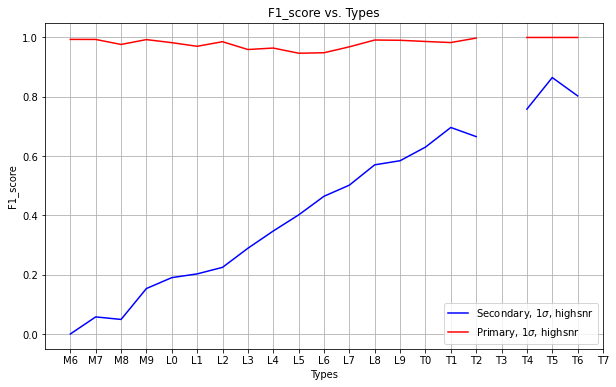

In [40]:
lettertypes = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7']
plt.figure(figsize=(10, 6))

x = f1_scoresec_hig1
y = f1_scoreprim_hig1
secondary_types = list(range(16, 38))
accuracy_sec = [x[i] for i in range(16, 33)]+[np.nan]+[x[i] for i in range(34, 37)]+[np.nan]
primary_types = list(range(16, 38))
accuracy_prim = [y[i] for i in range(16, 33)]+[np.nan]+[y[i] for i in range(34, 37)]+[np.nan]
plt.plot(lettertypes, accuracy_sec, linestyle='-', color='b', label='Secondary, 1$\sigma$, highsnr')
plt.plot(lettertypes, accuracy_prim, linestyle='-', color='r', label='Primary, 1$\sigma$, highsnr')

# x = f1_scoresec_mid1
# y = f1_scoreprim_mid1
# secondary_types = list(range(16, 38))
# accuracy_sec = [x[i] for i in secondary_types]
# primary_types = list(range(16, 38))
# accuracy_prim = [y[i] for i in primary_types]
# plt.plot(lettertypes, accuracy_sec, linestyle='-', color='b', label='Secondary, 1$\sigma$, midsnr', alpha=0.7)
# plt.plot(lettertypes, accuracy_prim, linestyle='-', color='r', label='Primary, 1$\sigma$, midsnr', alpha=0.7)

# x = f1_scoresec_low1
# y = f1_scoreprim_low1
# secondary_types = list(range(16, 38))
# accuracy_sec = [x[i] for i in secondary_types]
# primary_types = list(range(16, 38))
# accuracy_prim = [y[i] for i in primary_types]
# plt.plot(lettertypes, accuracy_sec, linestyle='-', color='b', label='Secondary, 1$\sigma$, lowsnr', alpha=0.4)
# plt.plot(lettertypes, accuracy_prim, linestyle='-', color='r', label='Primary, 1$\sigma$, lowsnr', alpha=0.4)

plt.xlabel('Types')
plt.ylabel('F1_score')
plt.title('F1_score vs. Types')
plt.grid(True)
plt.legend()
# plt.savefig('paperfigures/M6_L7'+modelname+'_FluxModel_primary_and_secondary_1sigma_3sigma_f1score_lineplot',facecolor='white')
plt.show()